In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
import math
import tensorflow as tf
from sklearn.metrics import mean_absolute_error,mean_squared_error

OPEN-> 
CLOSE->

HIGH->
LOW->
PREV.CLOSE->
LTP->
CLOSE->
VWAP-> It's a trading benchmark that represents the average price a security has traded at throughout the day, based on both volume and price.
52W H->
52W L->	
VOLUME->
value->
NO OF TRADES->


In [2]:
read_data_dir="D:\\programs\\ads_flask\\cleaned"

In [3]:
ls=[]
files=[]
for root, dirs, files in os.walk(read_data_dir, topdown=False):
   for name in files:
      ls.append(os.path.join(root, name))
for i in range(len(files)):
   files[i]=files[i].replace(".csv","")

In [4]:
ls[29]

'D:\\programs\\Applied data Science\\proj\\cleaned\\KOTAKBANK.csv'

In [5]:
# for i in ls:
df=pd.read_csv(ls[0])
    # df
    # dfr=pd.DataFrame(index=pd.to_datetime(df["Date "]))
dfr=pd.DataFrame(df[["close ","OPEN "]])
dfr["date"]=pd.to_datetime(df["Date "])
dfr=dfr.iloc[::-1]
dfr.reset_index(inplace=True,drop=True)
dfr["pct_chn"]=abs(dfr["OPEN "].shift(1)-dfr["OPEN "])/(dfr["close "]+dfr["OPEN "])
dfr["logret"]=np.log(dfr["close "]) - np.log(dfr["close "].shift(1))
dfr["pct_chn"][0]=0
dfr["logret"][0]=0
dfr

C:\Users\Dell\AppData\Local\Temp\ipykernel_7200\4266550016.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr["pct_chn"][0]=0
C:\Users\Dell\AppData\Local\Temp\ipykernel_7200\4266550016.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr["logret"][0]=0


,close,OPEN,date,pct_chn,logret
0,182.80,181.00,2013-06-21,0.000000,0.000000
1,182.15,180.90,2013-06-24,0.000275,-0.003562
2,188.65,182.15,2013-06-25,0.003371,0.035063
3,185.50,191.35,2013-06-26,0.024413,-0.016839
4,191.85,188.25,2013-06-27,0.008156,0.033659
...,...,...,...,...,...
2481,2457.15,2469.90,2023-06-14,0.005906,-0.002195
2482,2485.65,2469.00,2023-06-15,0.000182,0.011532
2483,2509.60,2499.20,2023-06-16,0.006029,0.009589
2484,2401.40,2504.00,2023-06-19,0.000979,-0.044071


In [6]:
dfr.describe()

,close,OPEN,pct_chn,logret
count,2486.000000,2486.000000,2486.000000,2486.000000
mean,657.927615,658.484735,0.012499,0.001038
std,910.635139,912.344693,0.042722,0.048775
min,58.750000,59.000000,0.000000,-1.758565
25%,129.850000,130.000000,0.003470,-0.012502
50%,201.025000,201.000000,0.007894,0.001613
75%,662.700000,665.075000,0.015322,0.016512
max,4165.300000,4175.000000,2.018377,0.241910


{'whiskers': [<matplotlib.lines.Line2D at 0x20fa9e07520>,
 'caps': [<matplotlib.lines.Line2D at 0x20fa9e07a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x20fa9e07280>],
 'medians': [<matplotlib.lines.Line2D at 0x20fa9e07fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20fa9e50280>],
 'means': []}

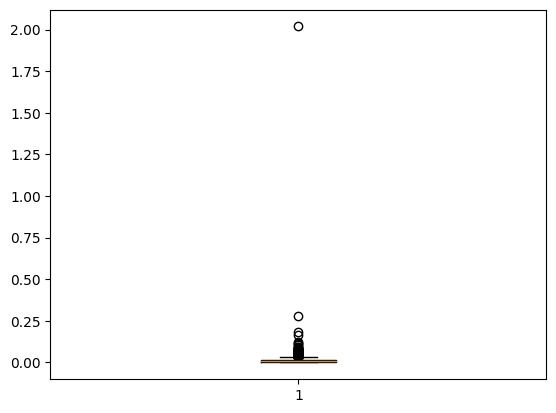

In [7]:
plt.boxplot(dfr["pct_chn"])

In [8]:
c=0
for i in range(dfr["close "].size):
    if(dfr["pct_chn"][i]>0.3):
        dfr["pct_chn"][i]=dfr["pct_chn"].mean()
        dfr["logret"][i-1]=dfr["logret"].mean()
        c+=1
        print(dfr[i-3:i+3])
c

     close    OPEN        date   pct_chn    logret
475  633.05  709.00 2015-06-01  0.018628 -0.109491
476  637.00  638.00 2015-06-02  0.055686  0.006220
477  109.75  573.30 2015-06-03  0.094722  0.001038
478  116.55  112.00 2015-06-04  0.012499  0.060115
479  115.25  117.00 2015-06-05  0.021529 -0.011217
480   99.75  116.65 2015-06-08  0.001617 -0.144437


C:\Users\Dell\AppData\Local\Temp\ipykernel_7200\1162580162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr["pct_chn"][i]=dfr["pct_chn"].mean()
C:\Users\Dell\AppData\Local\Temp\ipykernel_7200\1162580162.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr["logret"][i-1]=dfr["logret"].mean()


1

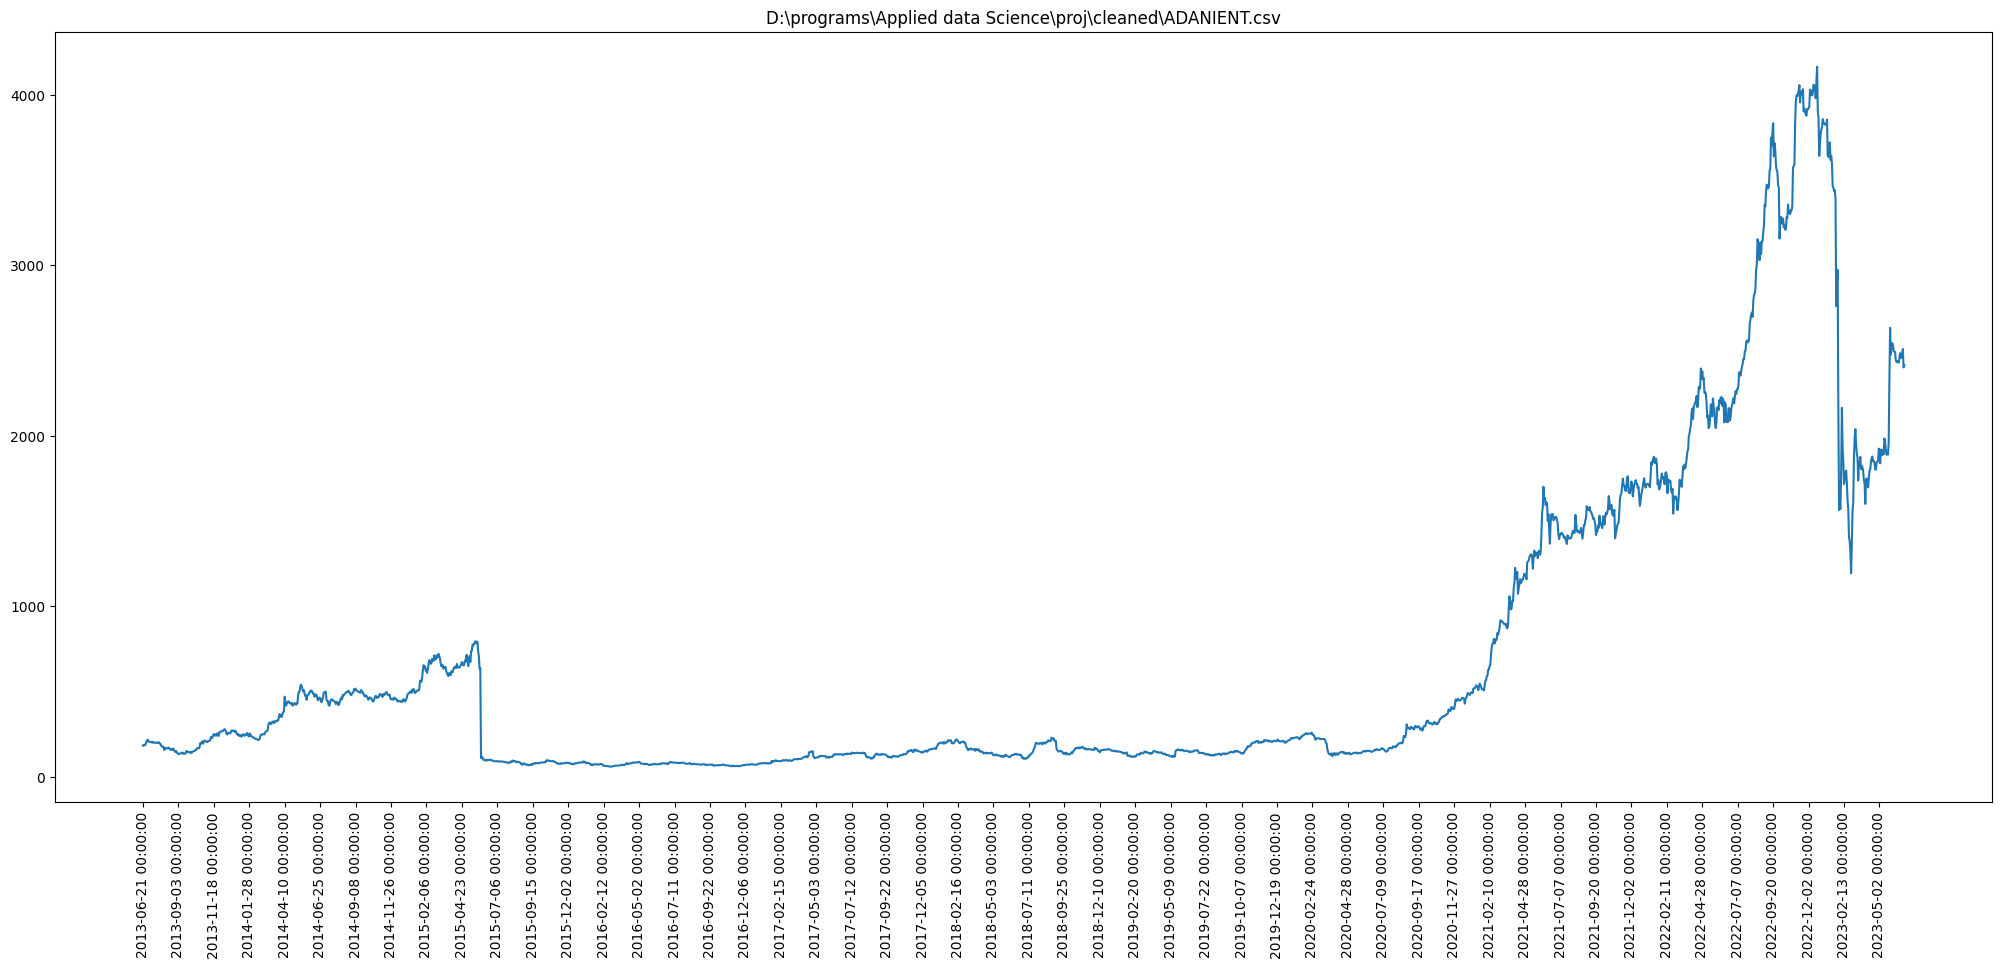

In [9]:
_=plt.figure(figsize=(25,10))
_=plt.plot(np.arange(dfr["close "].size),dfr["close "])
_=plt.xticks(ticks=np.arange(dfr["close "].size,step=50),labels=dfr["date"][::50],rotation=90)
_=plt.title(ls[0])

In [10]:
def ac_vs_pr(yac,ypr,title,option,file_index):
    '''plots the actual and predicted values'''
    plt.figure(figsize=(55,20))
    plt.title(title)
    plt.plot(np.arange(yac.size),ypr,label="ypredicted")
    plt.plot(np.arange(yac.size)+0.1,yac,label="yactual",alpha=0.6)
    plt.legend()
    plt.show()
    # plt.savefig("D:\\programs\\Applied data Science\\proj\\reg_res\\plots\\"+files[file_index]+" "+title+"_"+option+".png")

#### Model uses keras API from tensorflow
#### Model predicts based on close log ret 

In [11]:
time=90# time range to predict

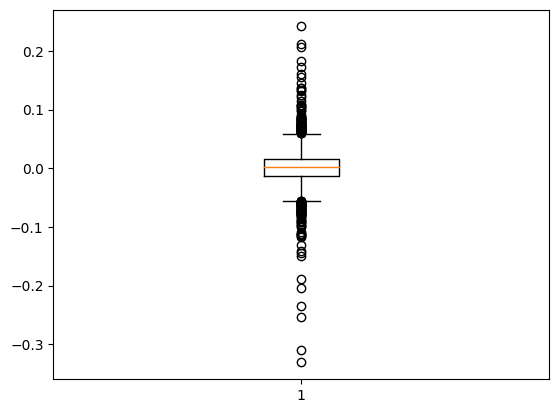

In [12]:
_=plt.boxplot(dfr["logret"])

In [13]:
data=[]
for i in range(time,dfr["OPEN "].size):
    data.append(np.array(dfr["logret"][i-time:i]))

In [14]:
data=pd.DataFrame(data)
dfr["OPEN "].size,data.shape

(2486, (2396, 90))

In [15]:
data.T[0].size

90

In [16]:
split=math.ceil(data.shape[0]*0.8)
split

1917

In [17]:
x_train=[]
y_train=[]
for i in range(split-1):
    x_train.append(data.T[i])
    y_train.append(data.T[i+1])
x_test=[]
y_test=[]
for i in range(split,data.shape[0]-1):
    x_test.append(data.T[i])
    y_test.append(data.T[i+1])
x_train=np.array(x_train).reshape(split-1,time,1)
x_test=np.array(x_test).reshape(data[0].size-split-1,time,1)
y_train=np.array(y_train).reshape(split-1,time,1)
y_test=np.array(y_test).reshape(data[0].size-split-1,time,1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1916, 90, 1), (478, 90, 1), (1916, 90, 1), (478, 90, 1))

In [18]:
x_t=[]
y_t=[]
for i in range(data.shape[0]-1):
    x_t.append(data.T[i])
    y_t.append(data.T[i+1])
x_t=np.array(x_t).reshape(data[0].size-1,time,1)
y_t=np.array(y_t).reshape(data[0].size-1,time,1)

In [18]:
# building nueral network architecture
rl=Sequential()
rl.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
rl.add(Dropout(0.3,seed=170))
rl.add(LSTM(units=50,return_sequences=True))
rl.add(Dropout(0.3,seed=170))
rl.add(LSTM(units=50,return_sequences=True))
rl.add(Dropout(0.3,seed=170))
rl.add(LSTM(units=50,return_sequences=False))
rl.add(Dropout(0.3,seed=170))
rl.add(Dense(units=time))
# rl.add(Activation('sigmoid'))

In [24]:
# # fitting the nueral network
rl.compile(optimizer="adam",loss="mean_squared_error",run_eagerly=False)
rl.fit(x_train,y_train,epochs=100,batch_size=32)
# loading the model from a file
# rl=tf.keras.models.load_model("D:\\programs\\ads_flask\\logres_op\\model\\"+files[0]+".h5")

In [29]:
#generating predicted values for the train and test datasets
op_te=rl.predict(x_test)
op_tr=rl.predict(x_train)

60/60 [==============================] - 2s 39ms/step


In [30]:
op_te.shape

(478, 90)

In [33]:
y_test.shape

(478, 90, 1)

In [129]:
#selecting particular data points
prte=[]
for i in range(0,op_te.shape[0],time):
    prte.append(op_te[i])
prte=np.array(prte,dtype='object')

In [130]:
prtr=[]
for i in range(0,op_tr.shape[0],time):
    prtr.append(op_tr[i])
prtr=np.array(prtr,dtype='object')

In [131]:
prte.shape

(6, 90)

In [141]:
# converting log returns back into actual values by using close price of stock at t
valte=[]
for i in range(0,prte.shape[0]):
    t=[]
    for j in range(prte[i].shape[0]):
        if(j==0):
            t.append(dfr["close "][split+i*time]*(math.e**prte[i][j]))#t+1
        else:
            t.append(math.e**prte[i][j]*t[j-1])#t+2 ...
    valte.append(t)
valte=pd.DataFrame(valte)
valte

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,909.753851,908.938729,906.433155,905.884903,906.318412,910.434660,915.435545,922.861382,931.907351,946.158690,...,1490.237794,1487.488618,1483.668057,1488.145334,1488.852151,1488.550667,1487.937185,1487.342277,1490.743424,1491.128815
1,1396.386927,1400.002651,1401.528482,1407.016322,1414.163471,1423.897440,1433.567502,1443.022372,1452.065470,1463.056461,...,1856.922124,1857.346579,1846.902199,1845.319187,1845.415919,1855.121255,1871.705817,1889.436353,1904.194933,1901.764949
2,1679.172569,1692.922118,1699.970333,1709.089201,1714.163228,1718.625148,1719.102354,1716.645686,1712.796036,1711.724361,...,1996.885648,2025.265592,2055.452702,2100.059544,2141.210678,2179.395347,2211.434451,2236.498032,2257.466831,2265.517131
3,2098.492621,2105.307935,2113.003370,2131.035939,2152.157375,2181.607322,2211.564902,2240.107022,2266.417788,2291.598285,...,2745.287915,2770.711041,2790.046714,2823.051362,2853.966685,2890.123149,2927.480921,2960.792235,2989.948543,2996.383425
4,3034.841758,3058.026680,3069.458698,3080.418495,3088.829576,3108.023898,3130.832203,3164.474203,3204.478628,3256.015577,...,4207.101413,4240.092902,4253.544297,4264.472527,4228.560492,4158.839530,4066.495001,3986.519751,3947.183013,3927.414081
5,3871.158032,3943.790066,3976.817726,3985.349033,3952.579780,3896.600799,3819.268006,3731.135435,3666.063246,3636.942031,...,2367.650443,2380.434850,2394.490914,2417.438443,2422.628977,2418.108913,2401.671273,2391.944467,2399.723706,2414.154674


In [147]:
valtr=[]
for i in range(0,prtr.shape[0]):
    t=[]
    for j in range(prtr[i].shape[0]):
        if(j==0):
            t.append(dfr["close "][i*time]*(math.e**prtr[i][j]))
        else:
            t.append(math.e**prtr[i][j]*t[j-1])
    valtr.append(t)
valtr=pd.DataFrame(valtr)
valtr

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,186.298013,189.913961,193.063148,196.617854,199.646913,202.536170,204.800398,206.265383,207.036325,207.439174,...,199.220268,204.452782,209.044266,213.937892,217.063678,219.049879,219.866561,220.255043,221.202226,221.396151
1,205.965485,209.332323,212.996447,218.129715,223.581978,229.223173,234.268643,238.556379,241.896677,244.465010,...,279.666132,280.341781,281.550205,286.644397,295.115137,306.876991,320.283046,331.977278,338.997620,339.953992
2,315.107480,317.015994,317.886675,319.233184,320.340388,322.539692,325.061343,329.221994,333.771617,339.644626,...,470.759452,465.457615,463.862674,468.862462,475.757014,482.941997,488.686256,491.788745,493.880298,493.694243
3,441.739172,441.033332,439.551117,439.484509,440.286183,443.612335,447.859653,453.457155,459.738841,467.649229,...,514.926677,515.636347,515.740089,518.054681,518.306050,518.025023,517.050721,516.194946,517.286560,517.185925
4,448.716711,450.553387,450.717822,451.027427,450.561474,450.733860,450.648952,451.747750,454.425364,460.135673,...,677.517117,679.056004,678.894090,682.278346,684.020376,685.625483,687.334823,689.175772,692.812376,694.449321
5,670.179358,668.495088,667.430136,670.925024,674.713290,681.385556,686.408692,691.341513,695.185934,699.939212,...,562.501371,545.745182,527.649091,514.418966,506.190389,506.274466,513.789389,524.814794,533.678724,536.357464
6,70.807644,69.762174,68.797071,68.384058,68.418894,69.131900,70.170856,71.540328,72.934117,74.400393,...,91.006596,91.298779,90.681693,89.908615,88.691502,87.702980,87.118658,87.065820,87.350083,87.265026
7,76.067575,74.725365,73.614379,73.144135,73.038191,73.542215,74.202499,74.925111,75.641027,76.232883,...,86.430578,85.258767,83.570474,82.277537,81.633663,82.185948,83.727492,85.672809,87.154482,87.489119
8,74.151801,73.856201,73.616888,73.802496,74.220230,75.084946,75.993299,77.012398,77.898237,78.727047,...,79.424062,78.994204,78.008636,77.180341,76.331574,75.911601,76.002694,76.442959,76.951785,76.927968
9,67.148765,67.719406,68.239536,68.934944,69.549329,70.166024,70.549470,70.649760,70.521430,70.291696,...,98.523393,99.106381,98.860551,98.677651,98.054911,97.624058,97.450614,97.525345,98.004087,98.102400


In [143]:
valte.shape

(6, 90)

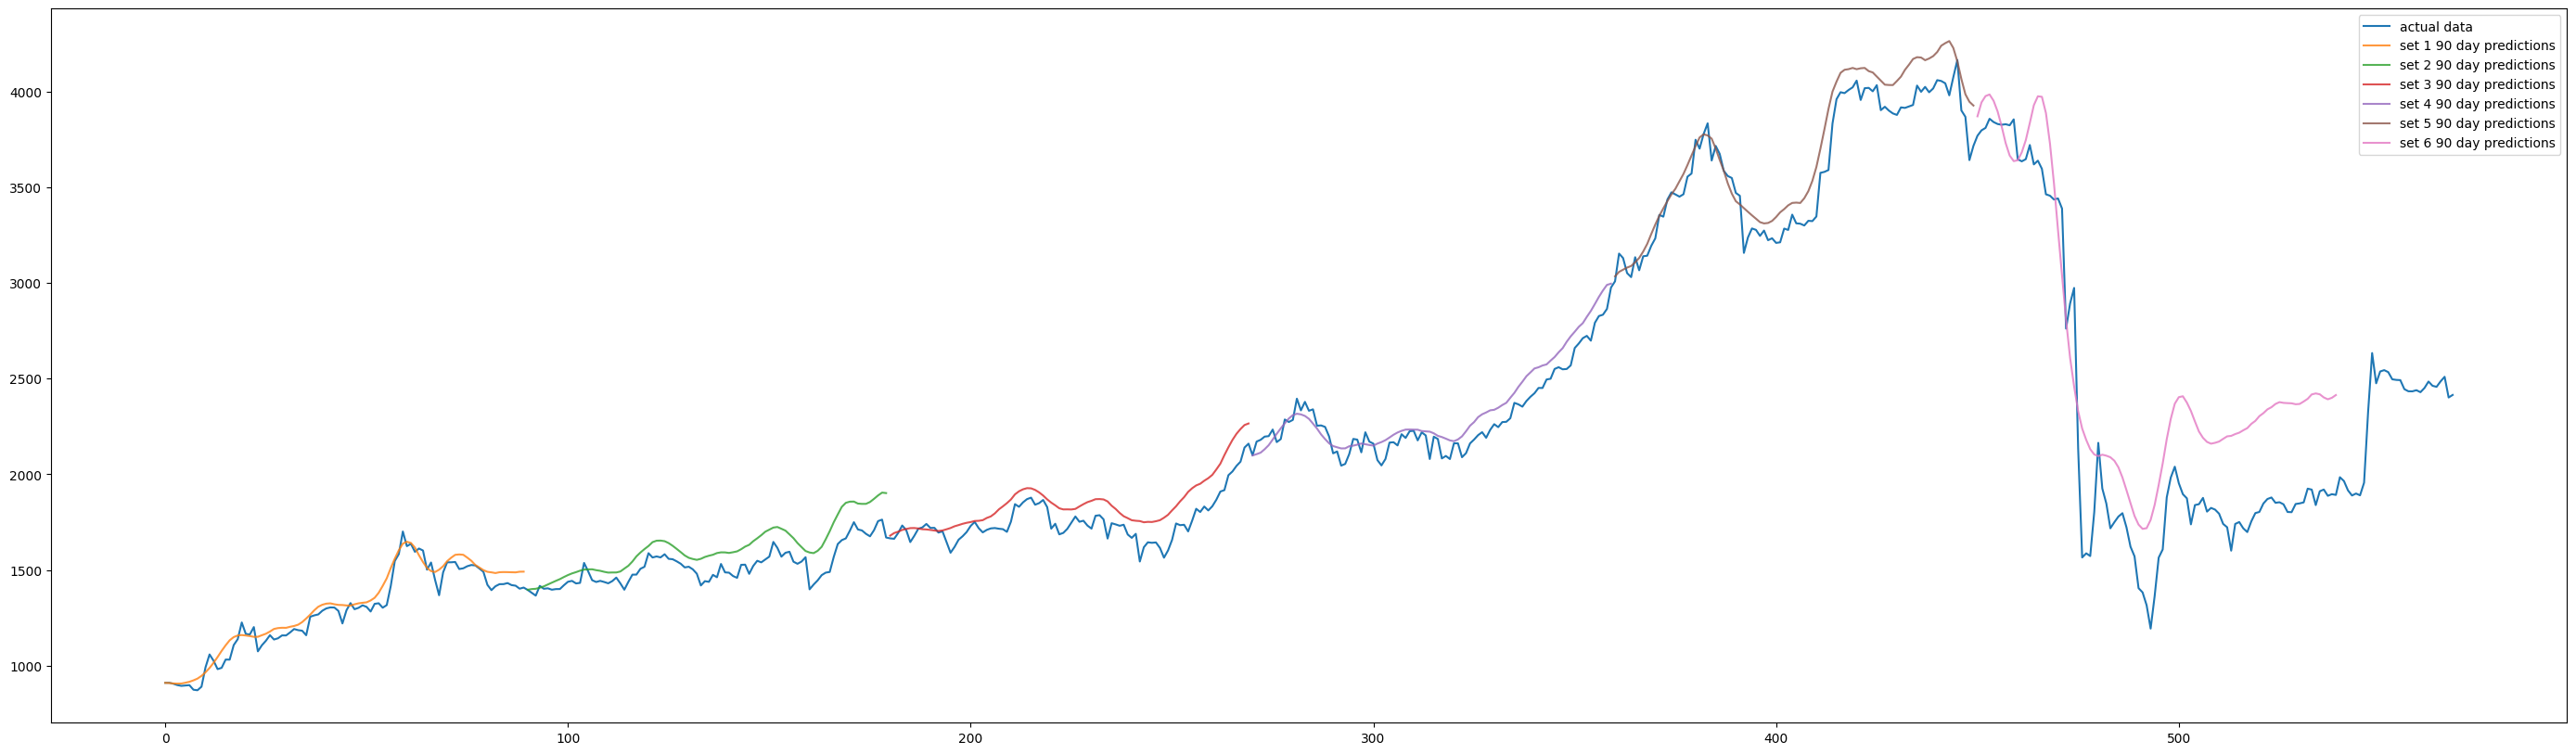

In [181]:
#plotting the graph
plt.figure(figsize=(35,10))
plt.plot(np.arange(dfr['close '][split:].size),dfr["close "][split:],label="actual data")
for i in range(valte.shape[0]):
    plt.plot(np.arange(start=i*time,stop=(i+1)*time),valte.T[i],label="set "+str(i+1)+" 90 day predictions",alpha=0.8)
plt.legend()
plt.savefig("D:\\programs\\Applied data Science\\proj\\reg_res_logret\\plots\\Train"+files[0]+".png")

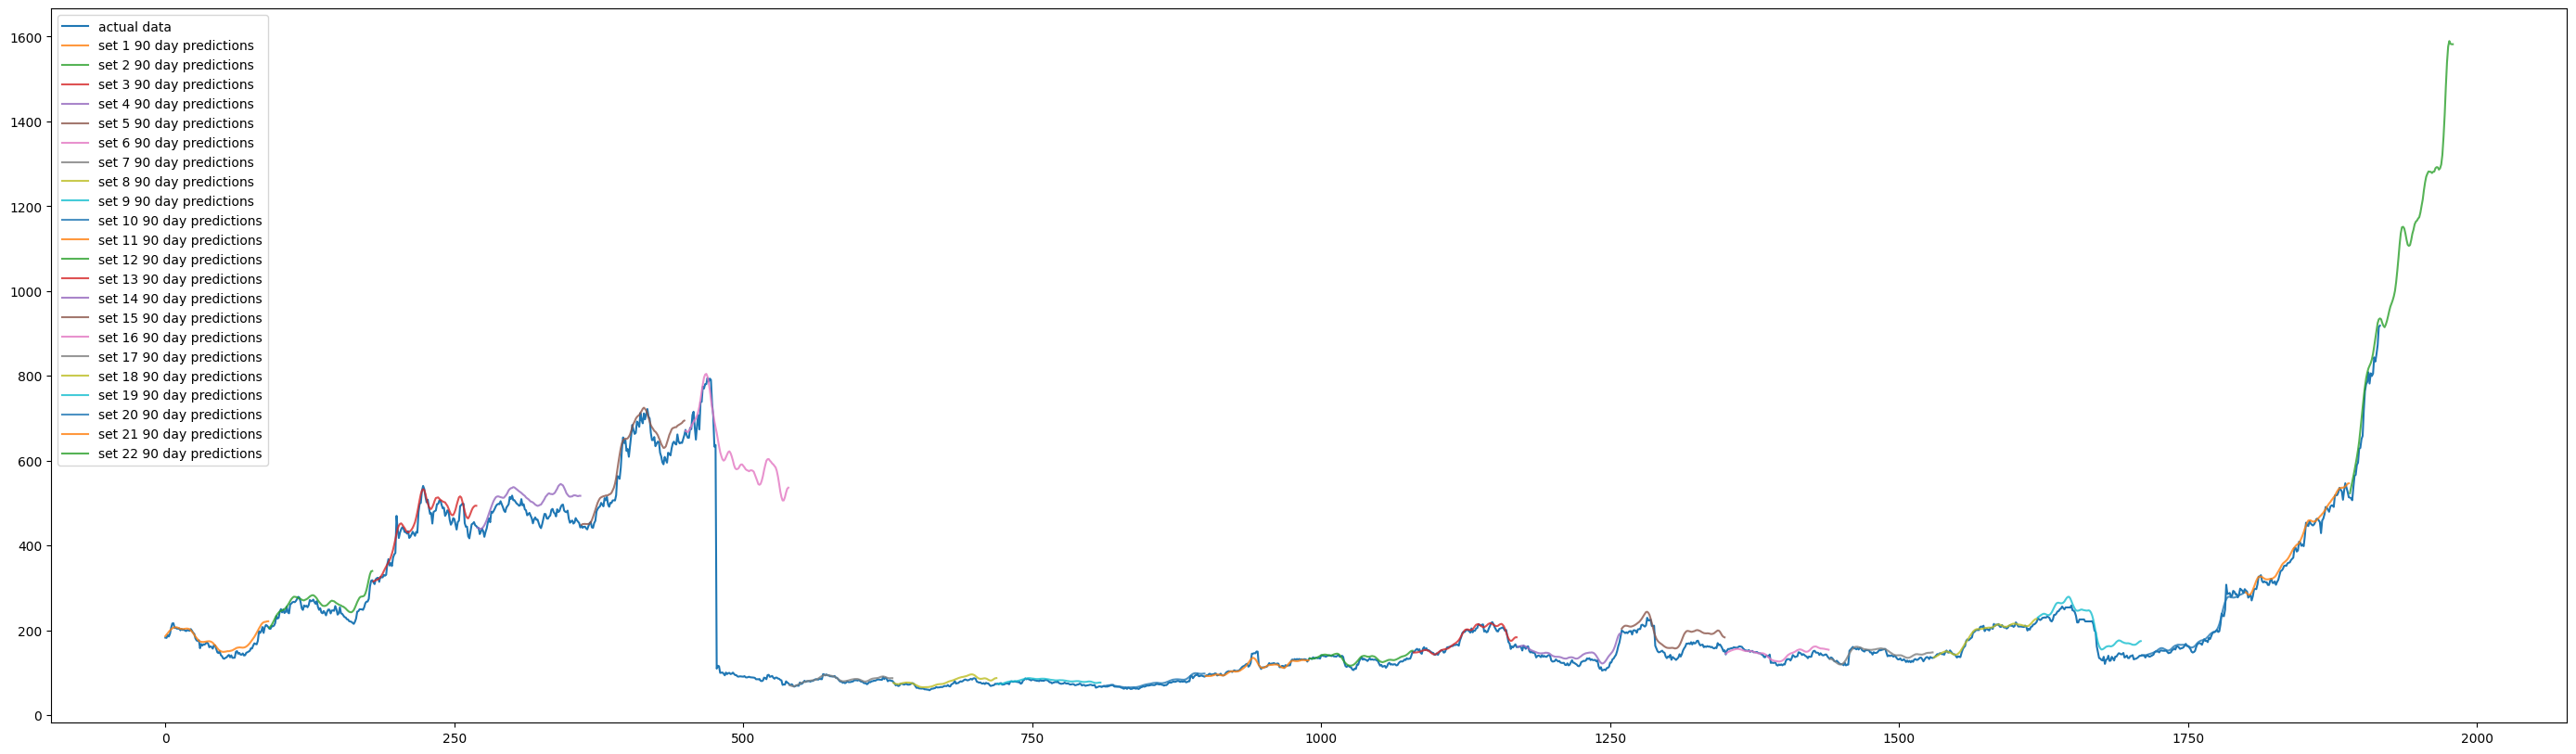

In [182]:
plt.figure(figsize=(35,10))
plt.plot(np.arange(dfr['close '][:split].size),dfr["close "][:split],label="actual data")
# cmap = matplotlib.colormaps['viridis']
for i in range(valtr.shape[0]):
    plt.plot(np.arange(start=i*time,stop=(i+1)*time),valtr.T[i],label="set "+str(i+1)+" 90 day predictions",alpha=0.8)
plt.legend()
plt.savefig("D:\\programs\\Applied data Science\\proj\\reg_res_logret\\plots\\Test"+files[0]+".png")

In [180]:
#saving the model
rl.save("D:\\programs\\Applied data Science\\proj\\reg_res_logret\\model\\"+files[0]+".h5")


In [1]:
# rl=tf.keras.models.load_model("D:\\programs\\Applied data Science\\proj\\reg_res_logret\\model\\"+files[0]+".h5")
# rl.predict(x_test)

In [25]:
ypr=rl.predict(x_t)

75/75 [==============================] - 5s 47ms/step


In [29]:
y_t

array([[[-0.00356214],
        [ 0.03506292],
        [-0.01683856],
        ...,
        [-0.00731739],
        [-0.0162411 ],
        [-0.01846954]],

       [[ 0.03506292],
        [-0.01683856],
        [ 0.03365893],
        ...,
        [-0.0162411 ],
        [-0.01846954],
        [-0.0009816 ]],

       [[-0.01683856],
        [ 0.03365893],
        [ 0.07140504],
        ...,
        [-0.01846954],
        [-0.0009816 ],
        [ 0.03189446]],

       ...,

       [[-0.31058501],
        [ 0.01367385],
        [-0.00892552],
        ...,
        [-0.00899477],
        [-0.00219526],
        [ 0.01153205]],

       [[ 0.01367385],
        [-0.00892552],
        [ 0.13663032],
        ...,
        [-0.00219526],
        [ 0.01153205],
        [ 0.00958918]],

       [[-0.00892552],
        [ 0.13663032],
        [ 0.18264967],
        ...,
        [ 0.01153205],
        [ 0.00958918],
        [-0.04407148]]])

In [28]:
ypr.shape,y_t.shape

((2395, 90), (2395, 90, 1))

In [31]:
prte=[]
for i in range(0,ypr.shape[0],time):
    prte.append(ypr[i])
prte=np.array(prte,dtype='object')

In [34]:
acte=[]
for i in range(0,y_t.shape[0],time):
    acte.append(y_t[i])
acte=np.array(acte,dtype='object')

In [35]:
valac=[]
for i in range(0,acte.shape[0]):
    t=[]
    for j in range(acte[i].shape[0]):
        if(j==0):
            t.append(dfr["close "][i*time]*(math.e**acte[i][j]))
        else:
            t.append(math.e**acte[i][j]*t[j-1])
    valac.append(t)
valac=pd.DataFrame(valac)
valac

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,[182.1499999999999],[188.65],[185.49999999999991],[191.85],[206.0499999999999],[216.14999999999986],[216.6999999999999],[205.64999999999992],[205.94999999999996],[204.04999999999993],...,[198.00000000000003],[193.85],[198.15],[207.8],[193.90000000000006],[207.25000000000006],[212.59999999999997],[211.05000000000007],[207.64999999999998],[203.85]
1,[203.65000000000015],[210.25000000000006],[209.40000000000006],[211.30000000000015],[216.95000000000002],[233.8500000000001],[227.90000000000003],[229.30000000000018],[244.25000000000014],[250.15000000000006],...,[248.3000000000004],[254.25000000000028],[263.9000000000004],[267.70000000000044],[267.9500000000004],[274.3500000000004],[303.1000000000003],[316.75000000000045],[318.3000000000003],[313.3500000000003]
2,[309.00000000000017],[320.2500000000002],[323.0000000000001],[324.05000000000024],[314.3500000000002],[326.0500000000002],[325.0000000000001],[324.9500000000003],[330.8000000000001],[328.9000000000003],...,[444.5500000000004],[421.6000000000004],[416.9000000000003],[433.50000000000057],[450.00000000000045],[451.60000000000025],[455.0500000000004],[447.95000000000033],[445.70000000000044],[442.7000000000004]
3,[441.3500000000001],[426.8999999999999],[432.6000000000001],[439.89999999999986],[433.80000000000007],[420.5],[431.85],[440.39999999999975],[454.4999999999998],[464.05000000000007],...,[456.85],[458.9500000000001],[451.74999999999994],[454.2499999999999],[464.54999999999984],[459.6499999999999],[456.34999999999997],[452.9499999999999],[442.54999999999984],[447.0000000000001]
4,[441.64999999999975],[444.25],[444.49999999999983],[440.54999999999995],[437.94999999999965],[445.69999999999993],[452.1999999999998],[455.4999999999997],[442.7999999999999],[441.5999999999997],...,[640.0000000000002],[638.0500000000002],[661.8000000000002],[645.4000000000004],[640.7500000000007],[642.5000000000006],[641.7500000000003],[651.2000000000003],[660.2000000000005],[672.7000000000004]
5,[660.2500000000002],[654.0000000000001],[653.9499999999997],[677.5000000000001],[674.2],[707.5999999999998],[715.4499999999998],[678.6500000000001],[649.6500000000002],[684.1499999999997],...,[498.5090858910331],[483.4027499549412],[477.0116078281333],[414.5527188615992],[421.5248739090262],[418.3293028456223],[463.6483106538981],[447.960961797187],[436.6312098451182],[418.3293028456223]
6,[71.25],[72.99999999999999],[69.39999999999999],[67.29999999999998],[68.40000000000002],[70.45],[69.49999999999996],[69.39999999999998],[77.09999999999994],[73.45],...,[90.09999999999998],[85.10000000000004],[88.60000000000002],[86.25000000000006],[79.95],[82.00000000000004],[82.35000000000002],[80.80000000000005],[80.85],[77.80000000000005]
7,[74.39999999999999],[70.09999999999995],[72.49999999999996],[68.79999999999995],[69.59999999999998],[73.74999999999999],[74.1],[73.24999999999999],[72.05],[72.84999999999995],...,[74.94999999999997],[74.94999999999997],[71.49999999999997],[68.89999999999999],[69.7],[70.55],[71.09999999999997],[74.10000000000002],[73.35000000000002],[74.64999999999998]
8,[72.85],[75.15],[75.55000000000001],[72.05000000000004],[72.30000000000001],[72.80000000000001],[74.90000000000006],[74.70000000000002],[74.65],[72.80000000000001],...,[71.60000000000007],[70.2500000000001],[70.50000000000007],[71.1500000000001],[64.90000000000008],[65.70000000000009],[67.00000000000004],[68.00000000000009],[67.65000000000009],[66.75000000000007]
9,[67.85],[69.05],[67.39999999999998],[67.6],[67.39999999999998],[68.54999999999997],[69.15],[71.15000000000002],[71.40000000000002],[71.40000000000002],...,[93.95000000000003],[94.55],[97.19999999999999],[91.85000000000002],[92.09999999999998],[93.64999999999996],[92.85000000000001],[91.70000000000005],[90.75000000000004],[92.24999999999997]


In [32]:
valpr=[]
for i in range(0,prte.shape[0]):
    t=[]
    for j in range(prte[i].shape[0]):
        if(j==0):
            t.append(dfr["close "][i*time]*(math.e**prte[i][j]))
        else:
            t.append(math.e**prte[i][j]*t[j-1])
    valpr.append(t)
valpr=pd.DataFrame(valpr)
valpr

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,184.823336,189.257086,195.363668,201.774453,207.737383,211.888649,213.422608,213.373056,211.616626,209.910850,...,198.911470,204.814434,209.090936,212.308314,214.769388,216.133161,217.738154,218.928356,219.983535,220.308802
1,204.774644,206.711845,210.092091,214.182778,219.235899,224.427602,229.686638,234.869902,238.953758,242.432910,...,264.602324,266.861724,269.694190,274.461238,281.578541,290.432231,302.891733,315.583062,324.176026,325.650179
2,314.485276,314.580005,314.954171,313.557632,313.257541,314.476120,317.142816,322.683727,328.248721,334.372436,...,439.621349,433.098761,432.684911,438.893248,447.413832,451.893538,452.293767,447.603581,443.310952,442.977978
3,437.248634,431.650945,428.026763,425.318989,426.045043,429.390076,434.765230,442.485301,449.669164,457.149187,...,466.163090,465.915153,465.387308,465.971386,467.414694,466.378147,463.162150,456.848526,451.889411,451.526279
4,447.365218,448.262421,450.001782,451.264449,452.375573,452.238600,451.606068,452.130559,452.877014,456.787869,...,662.049567,667.890831,666.699619,663.370504,659.548551,655.412661,657.572940,664.011547,670.474325,672.847362
5,672.544026,673.356755,677.998970,683.067900,689.037536,693.511588,694.971322,696.425759,695.805921,697.991536,...,533.213867,513.963653,490.940229,473.031154,465.602583,466.361528,473.913392,480.576720,483.772924,486.324050
6,70.985216,69.709656,68.548234,67.576350,67.255331,67.543173,68.546952,70.201762,72.045590,73.926706,...,88.015447,88.442514,87.677299,86.190249,84.433680,82.831879,82.169214,82.155947,82.415462,82.468307
7,75.714259,74.643433,74.356478,74.594507,75.166028,75.658065,75.886870,76.110123,76.052988,76.190375,...,82.412301,81.148566,79.704833,78.803010,78.652252,78.969962,79.886039,81.283723,82.452774,82.563638
8,75.459355,75.936210,76.130627,75.855054,75.451093,74.926028,74.711476,75.170956,76.164920,77.776479,...,77.187806,77.193239,76.201711,74.621608,72.901106,71.536657,71.543551,72.723731,73.820372,73.892894
9,66.736998,66.881496,67.223499,67.593624,68.137507,68.640300,69.071027,69.502440,69.597626,69.540056,...,93.438814,94.185235,94.238911,94.067413,93.743410,92.939453,92.290311,91.744875,91.602655,91.752855


In [38]:
valpr[0]

0      184.823336
1      204.774644
2      314.485276
3      437.248634
4      447.365218
5      672.544026
6       70.985216
7       75.714259
8       75.459355
9       66.736998
10      94.154079
11     135.488406
12     149.942997
13     160.530064
14     202.185298
15     143.747831
16     130.432228
17     137.090119
18     228.447566
19     139.486330
20     289.229840
21     513.114322
22    1585.820659
23    1558.930446
24    1623.281601
25    2275.727013
26    4013.051678
Name: 0, dtype: float64

In [43]:
def lstm_met(yac90,ypr90):
    maesum=0
    rmsesum=0
    for i in range(yac90.shape[1]):
        maesum+=mean_absolute_error(yac90[i],ypr90[i])
        rmsesum+=mean_squared_error(yac90[i],ypr90[i],squared=False)
    maesum/=yac90.shape[1]
    rmsesum/=yac90.shape[1]
    return(maesum,rmsesum)
lstm_met(valac.T,valpr.T)

(16.068928266369653, 19.820118254025967)